# Advent of Code 2025, Day 8

In [14]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from scipy.spatial.distance import pdist, squareform

with open('input.txt', 'r') as f:
    puzzle_input = f.read().strip()

coords = np.array([list(map(int, line.split(','))) for line in puzzle_input.split('\n')])

condensed_distance_matrix = pdist(coords, metric='euclidean')
sorted_condensed_dist_mat_idxes = np.argsort(condensed_distance_matrix)

G = nx.Graph()
G.add_nodes_from(range(len(coords)))

# Position dictionary for plotting (mapping node index to coordinate)
pos = {i: coords[i] for i in range(len(coords))}

node_xyz = np.array([pos[v] for v in sorted(G)])

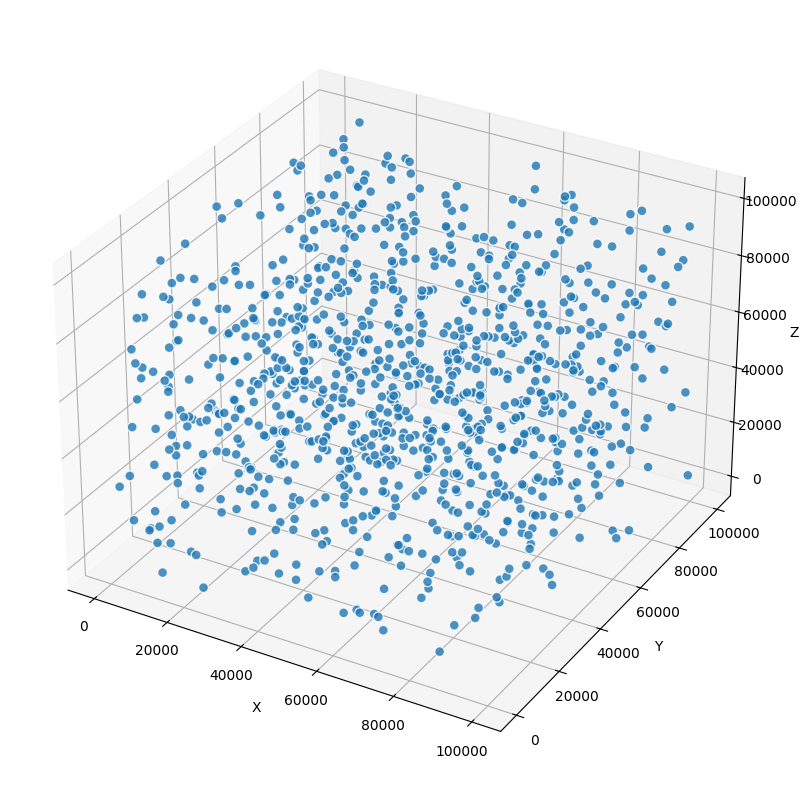

In [15]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection="3d")

ax.scatter(*node_xyz.T, s=50, ec="w", alpha=0.8)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.show()

In [16]:
def add_edges_by_index_if_no_path(G, indices):
    # Convert condensed indices to (u, v) node pairs
    rows, cols = np.triu_indices(len(coords), k=1)
    edges = list(zip(rows[indices], cols[indices]))

    for u, v in edges:
        if not nx.has_path(G, u, v):
            G.add_edge(u, v)

## [First Puzzle:](https://adventofcode.com/2025/day/8)

In [17]:
top_indices = sorted_condensed_dist_mat_idxes[:1000]

add_edges_by_index_if_no_path(G, top_indices)

clusters_list = list(nx.connected_components(G))

component_sizes = sorted([len(c) for c in clusters_list], reverse=True)
np.prod(component_sizes[:3])

np.int64(244188)

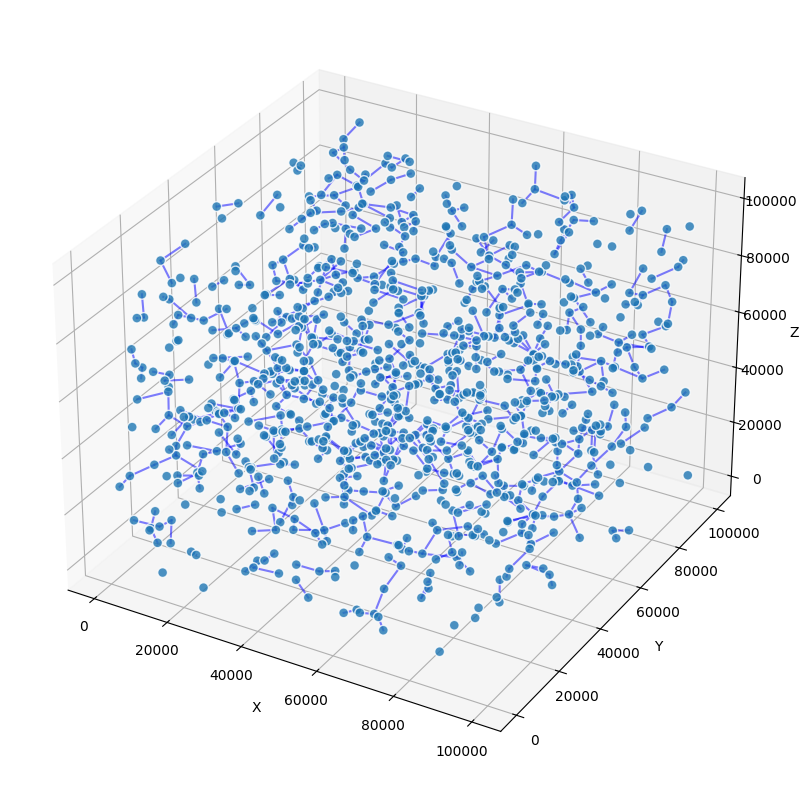

In [18]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection="3d")

ax.scatter(*node_xyz.T, s=50, ec="w", alpha=0.8)

for u, v in G.edges():
    x = [pos[u][0], pos[v][0]]
    y = [pos[u][1], pos[v][1]]
    z = [pos[u][2], pos[v][2]]
    ax.plot(x, y, z, c='b', alpha=0.5)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.show()

## [Second Puzzle:](https://adventofcode.com/2025/day/8/#part2)

In [19]:
remaining_indices = sorted_condensed_dist_mat_idxes[1001:]

final_idx = None
for idx in remaining_indices:
    add_edges_by_index_if_no_path(G, [idx])
    if 1 == len(list(nx.connected_components(G))):
        final_idx = idx
        break

rows, cols = np.triu_indices(len(coords), k=1)
u, v = rows[final_idx], cols[final_idx]
x = [pos[u][0], pos[v][0]]
np.prod(x)

np.int64(8361881885)

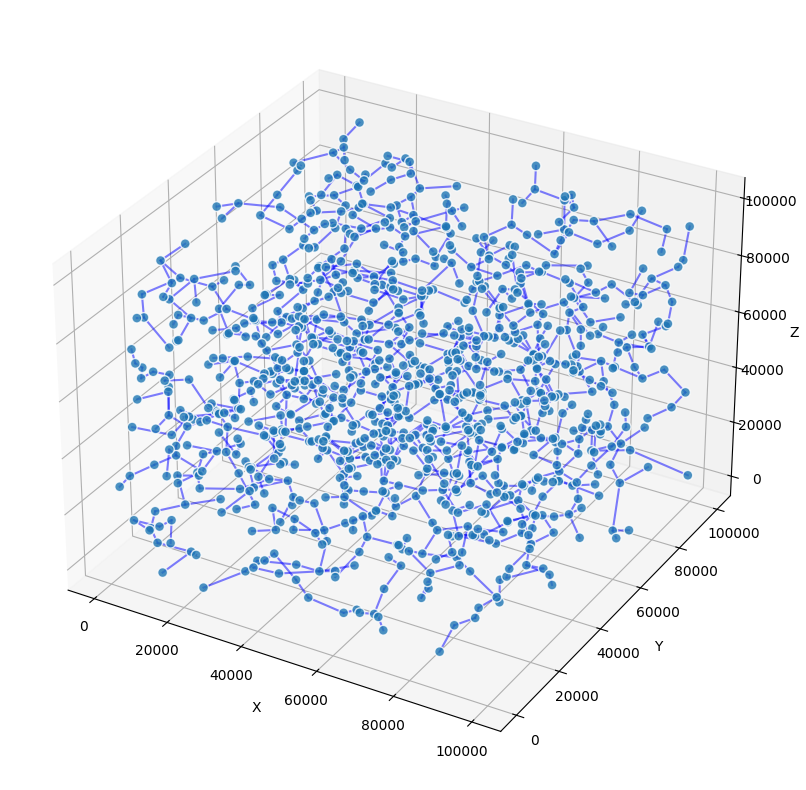

In [20]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection="3d")

ax.scatter(*node_xyz.T, s=50, ec="w", alpha=0.8)

for u, v in G.edges():
    x = [pos[u][0], pos[v][0]]
    y = [pos[u][1], pos[v][1]]
    z = [pos[u][2], pos[v][2]]
    ax.plot(x, y, z, c='b', alpha=0.5)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.show()